In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("d:/kovai-data-science-intern/data/data.csv")

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.fillna(0,inplace =True)
df['Total']= df[['Local Route', 'Light Rail','Peak Service','Rapid Route', 'School','Other']].sum(axis=1)

C:\Users\hku16\AppData\Local\Temp\ipykernel_17164\277661352.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1918 non-null   float64       
 7   Total         1918 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 120.0 KB


In [13]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total
0,2024-08-30,16436,10705,225,19026,3925,59.0,50376.0
1,2023-09-15,15499,10671,267,18421,4519,61.0,49438.0
2,2021-12-28,1756,2352,0,3775,0,13.0,7896.0
3,2023-01-11,10536,8347,223,14072,0,48.0,33226.0
4,2021-09-11,820,612,0,1283,0,11.0,2726.0


In [14]:
df = df.sort_values(by='Date')

In [15]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total
1013,2019-07-01,15987,9962,407,21223,3715,0.0,51294.0
1120,2019-07-02,16895,10656,409,21715,3993,0.0,53668.0
1451,2019-07-03,16613,10658,427,22025,3638,0.0,53361.0
1171,2019-07-04,16604,10445,437,21868,3576,0.0,52930.0
1523,2019-07-05,16040,10532,400,20697,2856,0.0,50525.0


In [16]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.day_name()

In [17]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total,year,month,day,weekday
1013,2019-07-01,15987,9962,407,21223,3715,0.0,51294.0,2019,7,1,Monday
1120,2019-07-02,16895,10656,409,21715,3993,0.0,53668.0,2019,7,2,Tuesday
1451,2019-07-03,16613,10658,427,22025,3638,0.0,53361.0,2019,7,3,Wednesday
1171,2019-07-04,16604,10445,437,21868,3576,0.0,52930.0,2019,7,4,Thursday
1523,2019-07-05,16040,10532,400,20697,2856,0.0,50525.0,2019,7,5,Friday


In [18]:
from sklearn.preprocessing import MinMaxScaler

year_values = df['year'].values.reshape(-1,1)

minmax = MinMaxScaler()
df['year_scaled'] = minmax.fit_transform(year_values)

In [19]:
df.tail()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total,year,month,day,weekday,year_scaled
1662,2024-09-25,21,0,1,10,8,0.0,40.0,2024,9,25,Wednesday,1.0
1330,2024-09-26,9,0,0,0,2,0.0,11.0,2024,9,26,Thursday,1.0
1731,2024-09-27,6,0,0,13,0,0.0,19.0,2024,9,27,Friday,1.0
1652,2024-09-28,1,0,0,4,0,0.0,5.0,2024,9,28,Saturday,1.0
160,2024-09-29,1,0,0,3,0,0.0,4.0,2024,9,29,Sunday,1.0


In [20]:
week_map = {
    'Sunday':1,
    'Monday': 2,
    'Tuesday':3,
    'Wednesday': 4,
    'Thursday':5,
    'Friday': 6,
    'Saturday':7

}


df['weekday_num'] = df['weekday'].map(week_map)

In [21]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other,Total,year,month,day,weekday,year_scaled,weekday_num
1013,2019-07-01,15987,9962,407,21223,3715,0.0,51294.0,2019,7,1,Monday,0.0,2
1120,2019-07-02,16895,10656,409,21715,3993,0.0,53668.0,2019,7,2,Tuesday,0.0,3
1451,2019-07-03,16613,10658,427,22025,3638,0.0,53361.0,2019,7,3,Wednesday,0.0,4
1171,2019-07-04,16604,10445,437,21868,3576,0.0,52930.0,2019,7,4,Thursday,0.0,5
1523,2019-07-05,16040,10532,400,20697,2856,0.0,50525.0,2019,7,5,Friday,0.0,6


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
X= df[['month', 'weekday_num', 'day','Total']]
y = df['Local Route']

In [24]:
X_train, X_test, y_train,y_test = train_test_split(X,y)

model = LinearRegression()
model.fit(X_train, y_train)

# Technical Report: Linear Regression for Ridership Forecasting
## Introduction
Linear regression was used to predict `Local Route` ridership, with plans to extend to other modes.
## Algorithm
Linear regression models \( y = X\beta + \epsilon \), minimizing MSE.
## Features
- month, weekday_num, day, Total
## Parameters
- fit_intercept=True, normalize=False
## Performance
- MSE: 635,466.92, R²: 0.983
## Conclusion
Effective for `Local Route`; extend to other modes and refine features.

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [26]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
mse

635466.9180923286

In [28]:
r2

0.9832743033743511

In [29]:
pred = model.predict([[7,2,1,51294.1]])

d:\kovai-data-science-intern\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
pred

array([16351.8905085])

In [31]:
def give_model(y): # gives models for every column like Local route, peek and all
    X_train, X_test, y_train,y_test = train_test_split(X,y)
    model = LinearRegression()
    model.fit(X_train, y_train)

    return model

In [39]:
def give_prediction(x): #makes predictions
    preds = []
    for i in x:
        print(i)
        preds.append(model.predict(i))

In [40]:
localRout_model = give_model(df['Local Route'])

In [41]:

test = [[[7,2,1,51294.1]]]
lst= give_prediction(test)

[[7, 2, 1, 51294.1]]


d:\kovai-data-science-intern\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
print(lst)

None


In [43]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from datetime import datetime, timedelta

# Define models for each mode
modes = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
models = {}
for mode in modes:
    X = df[['month', 'weekday_num', 'day', 'Total']]
    y = df[mode]
    model = LinearRegression().fit(X, y)
    models[mode] = model

# Generate 7-day forecast inputs (example for Oct 1–7, 2024)
forecast_dates = pd.date_range(start='2024-10-01', end='2024-10-07', freq='D')
forecast_data = []
avg_total = df['Total'].mean()  # Placeholder; estimate Total
for date in forecast_dates:
    forecast_data.append([date.month, date.weekday() + 1, date.day, avg_total])
forecast_df = pd.DataFrame(forecast_data, columns=['month', 'weekday_num', 'day', 'Total'])

# Predict for each mode
predictions = {}
for mode in modes:
    predictions[mode] = models[mode].predict(forecast_df)
forecast_results = pd.DataFrame(predictions, index=forecast_dates)
print(forecast_results)

            Local Route   Light Rail  Peak Service   Rapid Route       School
2024-10-01  9963.825160  6959.290072    197.745934  12573.952659  2523.699228
2024-10-02  9936.900562  7063.166810    188.967570  12576.202770  2452.934404
2024-10-03  9909.975964  7167.043548    180.189206  12578.452881  2382.169579
2024-10-04  9883.051366  7270.920285    171.410843  12580.702991  2311.404755
2024-10-05  9856.126768  7374.797023    162.632479  12582.953102  2240.639930
2024-10-06  9829.202171  7478.673761    153.854116  12585.203213  2169.875106
2024-10-07  9987.992403  6857.345544    205.451783  12575.371703  2593.099142


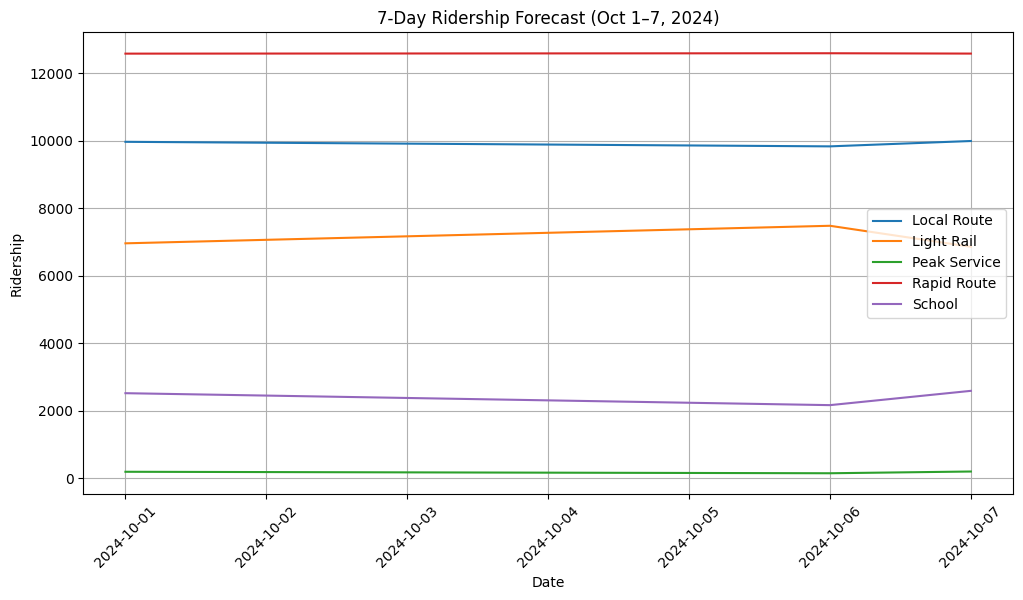

In [44]:
plt.figure(figsize=(12, 6))
for mode in modes:
    plt.plot(forecast_results.index, forecast_results[mode], label=mode)
plt.title('7-Day Ridership Forecast (Oct 1–7, 2024)')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()